## UN Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.
    
4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.
 
22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

In [4]:
gdp_df = pd.read_csv("../data/gdp_per_capital.csv")
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [5]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
gdp_df.sample(10)

,Country or Area,Year,Value,Value Footnotes
5455,Papua New Guinea,2014,3669.976750,NaN
15,Afghanistan,2006,1366.993146,NaN
3546,Kiribati,2012,1883.206083,NaN
3337,Israel,1995,26891.425123,NaN
4619,Middle East & North Africa (excluding high inc...,2006,9324.621732,NaN
6128,Singapore,2000,55959.032607,NaN
1281,Chad,2022,1412.670718,NaN
6712,Sweden,2020,51331.282223,NaN
5702,Pre-demographic dividend,1998,2446.879023,NaN
7074,Trinidad and Tobago,2010,27329.424682,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
#gdp_df = gdp_df.drop(columns="Value Footnotes")

In [9]:
gdp_df = (
    gdp_df
    .drop(columns="Value Footnotes")
    .rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
)

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df.shape

(7662, 3)

In [12]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


gdp_df has 7662 rows and 3 columns. 
The types of data of the columns are objects, integers and floats.

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
gdp_df.value_counts('Year').sort_index()
#gdp_df['Year'].value_counts()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

1990 all the way to 2022. Alot of the years that are more recent have moreobservations that older years. 

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [18]:
gdp_df.value_counts('Country')
# can also do gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

242 countries. These are smaller countries or island countries so they may not have the biggest population or the means to be well represented here. 

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [21]:
#Locating the year 2021 within the gdp_df dataframe
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [23]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Text(0.5, 1.0, 'Histogram of GDP_Per_Capita in 2021')

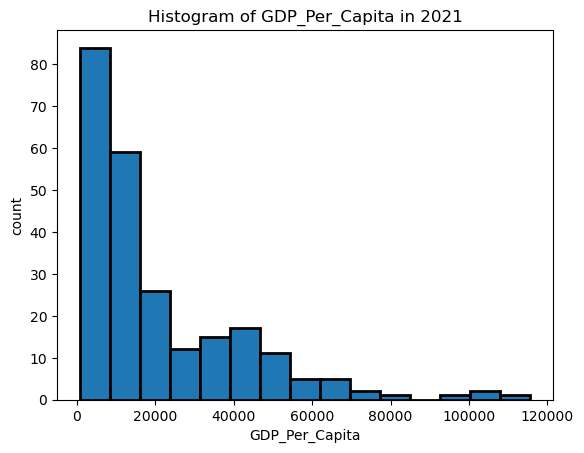

In [25]:
plt.hist(
    data = gdp_2021,
    x= 'GDP_Per_Capita',
    bins = 15,
    edgecolor = 'black',
    linewidth=2
);
plt.xlabel('GDP_Per_Capita')
plt.ylabel('count')
plt.title('Histogram of GDP_Per_Capita in 2021')

The distribution is very right skewed. 

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [28]:
gdp_2021.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809
...,...,...,...
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [30]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index ='Country', columns = 'Year')

In [31]:
#searching years 1990 & 2021 for anything not equal to 0 and using only that data (essentially omitting anything with a value of 0).
gdp_pivoted = gdp_pivoted[(gdp_pivoted[1990] != 0) & (gdp_pivoted[2021] != 0)]

In [32]:
#dropping null values with drop NA for subset yrs 1990 & 2021
gdp_pivoted = gdp_pivoted.dropna(subset =[1990,2021])
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [34]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677,2.049878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860,0.950043
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469,406.251608
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316,75.720074


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [36]:
gdp_pivoted.value_counts([gdp_pivoted['Percent_Change'] <0])

Percent_Change
False             187
True               19
Name: count, dtype: int64

19 countries experienced a negative percent change in GDP per capita from 1990 to 2021

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [39]:
gdp_pivoted.sort_values(['Percent_Change'], ascending = True)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,708.178317,-39.236385
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,1132.654233,-38.654906
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,3210.403567,-35.406695
United Arab Emirates,105893.626059,101048.696239,99106.791640,95524.456926,97475.980854,99510.350680,99602.617418,100956.706467,95185.305822,92368.813265,...,64334.091552,68076.635891,71244.585815,71182.370717,71550.554332,71782.153836,67668.286641,69733.793774,74299.012980,-34.147317
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,819.192343,-30.243599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Myanmar,581.613311,579.378753,597.202183,635.107184,669.375053,708.504878,746.426565,781.596072,816.526211,875.418497,...,3658.593538,3748.294222,4109.557412,4312.947389,4556.281168,4829.536707,4947.093961,4032.625653,4124.485651,593.351678
East Asia & Pacific (IDA & IBRD),2218.031627,2350.517029,2550.731679,2775.055703,3015.333968,3259.565698,3499.876392,3684.752889,3666.469204,3836.000860,...,11108.380904,11738.607553,12400.285149,13113.364220,13862.310358,14568.640670,14618.556038,15586.699395,16115.185723,602.726652
East Asia & Pacific (excluding high income),2191.972060,2322.907488,2520.737656,2742.360622,2979.737360,3221.096140,3458.675406,3641.511465,3623.587749,3791.281266,...,10984.965475,11608.539002,12263.235967,12968.864325,13709.856140,14408.611619,14458.047242,15415.447708,15937.898618,603.268440


Equitorial Guinea had the highest percent change.

In [41]:
gdp_Equatorial_Guinea = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']

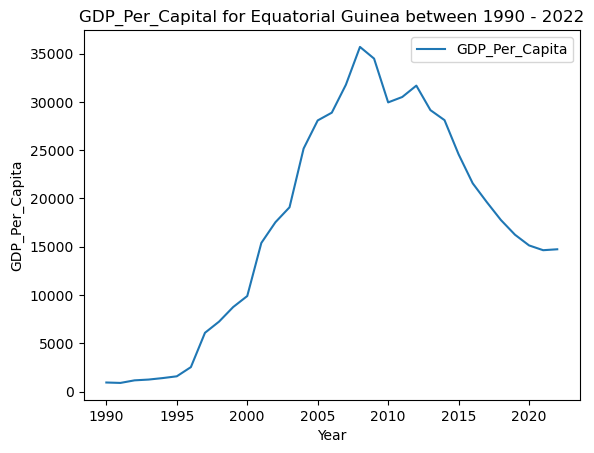

In [42]:
gdp_Equatorial_Guinea.plot(x='Year', y='GDP_Per_Capita', kind='line')
plt.title('GDP_Per_Capital for Equatorial Guinea between 1990 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

In [43]:
gdp_China = gdp_df.loc[gdp_df['Country'] == 'China']

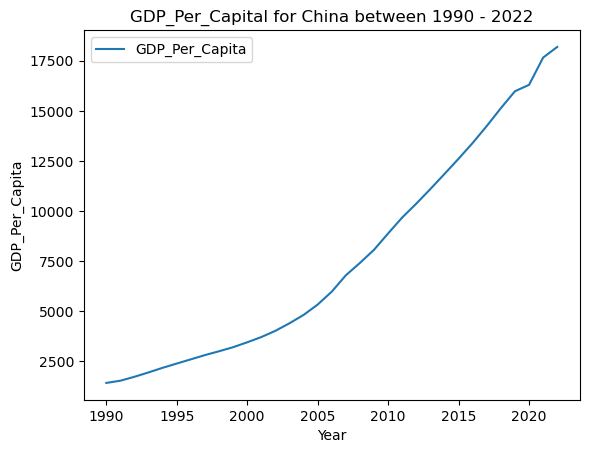

In [44]:
gdp_China.plot(x='Year', y='GDP_Per_Capita', kind='line')
plt.title('GDP_Per_Capital for China between 1990 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

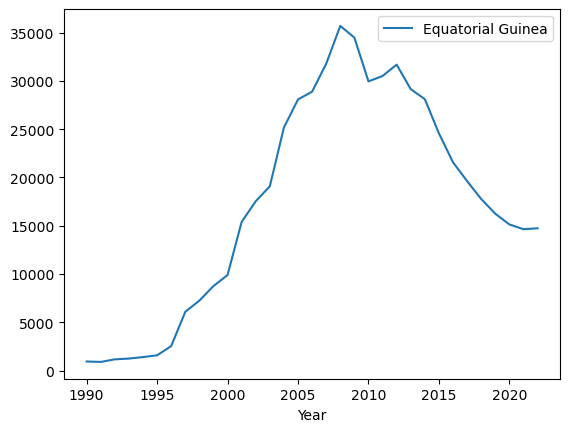

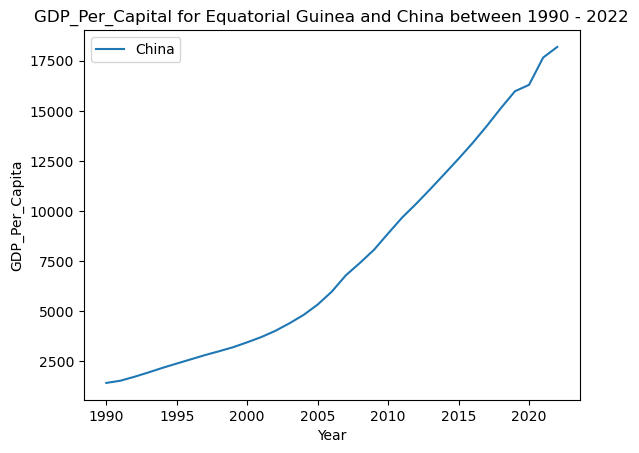

In [45]:
gdp_Equatorial_Guinea.plot(x='Year', y='GDP_Per_Capita', kind='line', label='Equatorial Guinea')
gdp_China.plot(x='Year', y='GDP_Per_Capita', kind='line', label= 'China')
plt.title('GDP_Per_Capital for Equatorial Guinea and China between 1990 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

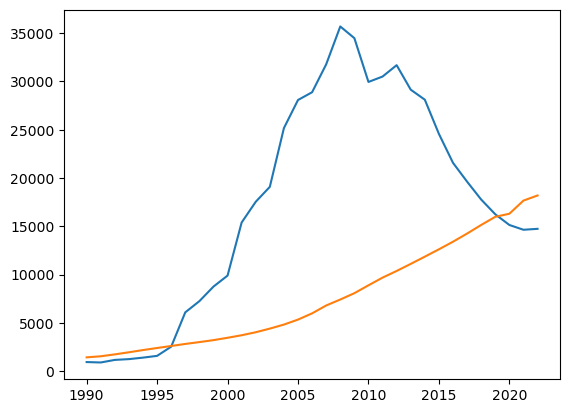

In [46]:
plt.plot(gdp_Equatorial_Guinea['Year'], gdp_Equatorial_Guinea['GDP_Per_Capita'], label = 'Equitorial_Guinea')
plt.plot(gdp_China['Year'], gdp_China['GDP_Per_Capita'], label= 'China')
plt.show()

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [48]:
continents = pd.read_csv("../data/continents.csv")
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [50]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [51]:
gdp_df = pd.merge(gdp_df,continents, how = "inner", on='Country')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

In [53]:
gdp_df_bar = gdp_df.drop_duplicates('Country').value_counts('Continent')

gdp_df_bar.plot(x='Continent', y='Country', kind='bar')
plt.title('Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.show()

20.Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [56]:
import seaborn as sns

In [57]:
gdp_box_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

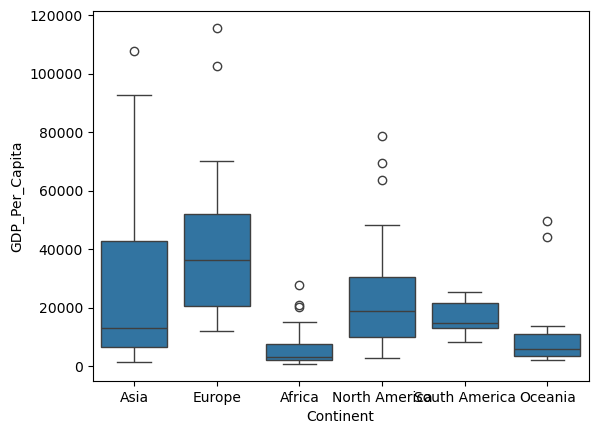

In [58]:
sns.boxplot(x='Continent', y='GDP_Per_Capita', data = gdp_box_2021)
plt.show()

it looks as thought multiple continents have outliers. Africa is the lowest in terms of GDP_Per_Capita. Europe has the highest mean but Asia has the highest 75th percentile. 

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [61]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv", skiprows = 4)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [63]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'], axis=1)
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN


In [64]:
years = life_expectancy.drop('Country Name', axis = 1)

In [65]:
years =years.columns.to_list()
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [66]:
life_expectancy = life_expectancy.melt(
    id_vars=['Country Name'], 
    value_vars=years, 
    var_name='Year', 
    value_name='Life_Expectancy'
)
life_expectancy

,Country Name,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


23. What was the first country with a life expectancy to exceed 80?

In [68]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] >80]

,Country Name,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16692,Qatar,2022,81.559000
16700,Singapore,2022,82.895122
16714,Slovenia,2022,81.282927
16715,Sweden,2022,83.109756


Arbua is the first country to have a life expectancy over 80. 

24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [71]:
#'Year' was created into a list in order to melt the data so, here, turning it back into integer values
life_expectancy['Year']=life_expectancy['Year'].astype(int)

In [72]:
gdp_le = pd.merge(left = gdp_df, 
         right = life_expectancy.rename(columns = {'Country Name': 'Country'}))

In [73]:
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [74]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5558,Zimbabwe,1994,2670.106615,Africa,52.588
5559,Zimbabwe,1993,2458.783255,Africa,54.426
5560,Zimbabwe,1992,2468.278257,Africa,56.435
5561,Zimbabwe,1991,2781.787843,Africa,58.091
5562,Zimbabwe,1990,2704.757299,Africa,59.426


25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [76]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5403,Uzbekistan,2021,7800.501501,Asia,70.862
5436,Vanuatu,2021,2800.493866,Oceania,70.449
5469,West Bank and Gaza,2021,5641.044400,Asia,73.473
5498,Zambia,2021,3236.788981,Africa,61.223


In [77]:
gdp_over_80 = gdp_le_2021.loc[gdp_le_2021['Life_Expectancy'] >80]
gdp_over_80


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
251,Australia,2021,49774.340702,Oceania,83.300000
284,Austria,2021,54121.145542,Europe,81.190244
482,Belgium,2021,51823.507530,Europe,81.790244
969,Canada,2021,48218.038316,North America,81.587073
1001,Cayman Islands,2021,69400.666661,North America,82.009756
1277,Cyprus,2021,41694.257812,Europe,81.203000
1310,Denmark,2021,57962.654094,Europe,81.404878
1645,Finland,2021,48713.291489,Europe,81.885366
1678,France,2021,44993.125946,Europe,82.324390
1777,Germany,2021,53179.654405,Europe,80.790244


In [78]:
gdp_over_80.value_counts().value_counts()

count
1    31
Name: count, dtype: int64

31 countries 

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [81]:
gdp_le_2021.nlargest(3,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2871,Luxembourg,2021,115683.493708,Europe,82.597561
4423,Singapore,2021,107741.118436,Asia,83.092683
2299,Ireland,2021,102785.490239,Europe,82.353659


In [82]:
gdp_largest_2021 = gdp_le[gdp_le['Country'].isin(["Luxembourg", "Singapore", "Ireland"])]
gdp_largest_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2298,Ireland,2022,113870.785550,Europe,83.056098
2299,Ireland,2021,102785.490239,Europe,82.353659
2300,Ireland,2020,91356.855054,Europe,82.556098
2301,Ireland,2019,86925.906582,Europe,82.702439
2302,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
4450,Singapore,1994,46865.416894,Asia,76.197561
4451,Singapore,1993,43528.860736,Asia,76.046341
4452,Singapore,1992,40054.049796,Asia,75.946341
4453,Singapore,1991,38705.653871,Asia,75.646341


In [83]:
print(gdp_largest_2021.head())
print(gdp_largest_2021.dtypes)

      Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2298  Ireland  2022   113870.785550    Europe        83.056098
2299  Ireland  2021   102785.490239    Europe        82.353659
2300  Ireland  2020    91356.855054    Europe        82.556098
2301  Ireland  2019    86925.906582    Europe        82.702439
2302  Ireland  2018    83575.599241    Europe        82.204878
Country             object
Year                 int64
GDP_Per_Capita     float64
Continent           object
Life_Expectancy    float64
dtype: object


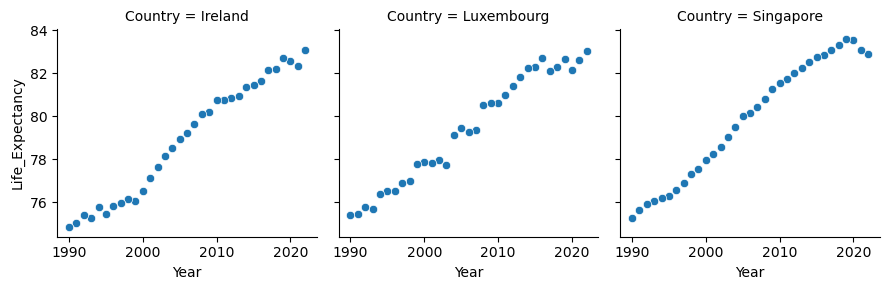

In [84]:
sns.FacetGrid(gdp_largest_2021, col= "Country").map(sns.scatterplot,'Year','Life_Expectancy')

26.Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

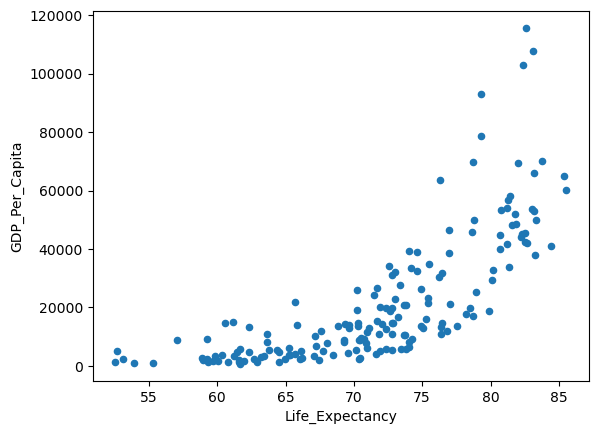

In [86]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life_Expectancy",
    y="GDP_Per_Capita"
);

the data is not linear, it appears exponential. 

28.Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [89]:
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


GDP Per Capita and Life Expectancy have a relatively large positive correlation to one another. 

29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [92]:
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463


In [151]:
gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021

C:\Users\lexil\AppData\Local\Temp\ipykernel_41024\1760617832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5403,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5436,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5469,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5498,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [153]:
gdp_le_2021[['Life_Expectancy', 'Log_GDP_Per_Capita']].corr()

,Life_Expectancy,Log_GDP_Per_Capita
Life_Expectancy,1.000000,0.846575
Log_GDP_Per_Capita,0.846575,1.000000


The correlation between the log of GDP Per Capital and Life Expectancy is even higher. At a positive correlation of .84

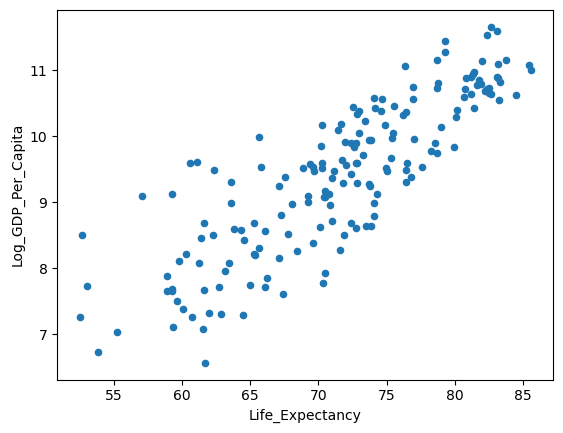

In [156]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life_Expectancy",
    y="Log_GDP_Per_Capita"
);

Much more linear in a positive correlation than the GDP_Per_Capita. 